In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/MultiCampus/Project II/pet_data

[Errno 2] No such file or directory: '/content/drive/MyDrive/MultiCampus/Project II/pet_data'
/content


In [3]:
# cat_dog_full 폴더 생성 코드

import os, shutil

original_dataset_dir = './train'

base_dir = '/cat_dog_full'
# os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir,'cats')
# os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir,'dogs')
# os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir,'cats')
# os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir,'dogs')
# os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir,'cats')
# os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir,'dogs')
# os.mkdir(test_dogs_dir)


In [4]:
train_dogs_dir

'/cat_dog_full/train/dogs'

In [5]:
cat_origin = './train/cat'
dog_origin = './train/dog'

In [6]:
# # 처음 한번만 돌리면 됨, 이미지 복사 
# fnames = ['cat{}.jpg'.format(i) for i in range(4000)]
# for fname in fnames:
#     try:
#         src = os.path.join(cat_origin,fname)
#         dst = os.path.join(train_cats_dir, fname)
#         shutil.copyfile(src,dst)
#     except:
#         print(f'error filename : {fname}')

In [ ]:
# # 처음 한번만 돌리면 됨, 이미지 복사 
# fnames = ['cat{}.jpg'.format(i) for i in range(4000, 5297)]
# for fname in fnames:
#     try:
#         src = os.path.join(cat_origin,fname)
#         dst = os.path.join(validation_cats_dir, fname)
#         shutil.copyfile(src,dst)
#     except:
#         print(f'error filename : {fname}')

In [ ]:
# fnames = ['cat{}.jpg'.format(i) for i in range(10000,12500)]
# for fname in fnames:
#     src = os.path.join(cat_origin,fname)
#     dst = os.path.join(test_cats_dir, fname)
#     shutil.copyfile(src,dst)

In [ ]:
# # 처음 한번만 돌리면 됨, 이미지 복사 
# fnames = ['dog{}.jpg'.format(i) for i in range(3500)]
# for fname in fnames:
#     try:
#         src = os.path.join(dog_origin,fname)
#         dst = os.path.join(train_dogs_dir, fname)
#         shutil.copyfile(src,dst)
#     except:
#         print(f'error filename : {fname}')

In [ ]:
# # 처음 한번만 돌리면 됨, 이미지 복사 
# fnames = ['dog{}.jpg'.format(i) for i in range(3500, 4531)]
# for fname in fnames:
#     try: 
#         src = os.path.join(dog_origin,fname)
#         dst = os.path.join(validation_dogs_dir, fname)
#         shutil.copyfile(src,dst)
#     except:
#         print(f'error filename : {fname}')

In [ ]:
# ​fnames = ['dog{}.jpg'.format(i) for i in range(10000,12500)]
# for fname in fnames:
#     src = os.path.join(dog_origin,fname)
#     dst = os.path.join(test_dogs_dir, fname)
#     shutil.copyfile(src,dst)

- ImageDataGenerator

In [7]:
import os  # 폴더 결합에 필요
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [8]:
train_dir = './cat_dog_full/train'
valid_dir = './cat_dog_full/validation'

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255) 
validation_datagen = ImageDataGenerator(rescale=1/255) 

In [10]:
# class: target dir 안에 cats, dogs 있어서 오름차순(기본)을 무시하고, 지정해준 폴더명 대로 순서 
train_generator = train_datagen.flow_from_directory(train_dir,  # target directory
                                                    classes=['cats','dogs'], # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(150,150),
                                                    batch_size= 20,
                                                    class_mode='binary') 

validation_generator = validation_datagen.flow_from_directory(valid_dir,  # target directory
                                                    classes=['cats','dogs'], # cats, dogs directory 순서로 label 0,1을 설정
                                                    target_size=(150,150),
                                                    batch_size= 20,
                                                    class_mode='binary') 

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [ ]:
train_generator[0][0]
print(len(train_generator),len(validation_generator))

373 116


In [ ]:
# img 이미지 label 라벨
# 한번 반복시 batch_size(20)만큼 이미지(img), 라벨(label)
for img, label in train_generator:
    print('img의 shape : {}'.format(img.shape))
    print('label의 shape : {}'.format(label.shape))
    break

img의 shape : (20, 150, 150, 3)
label의 shape : (20,)


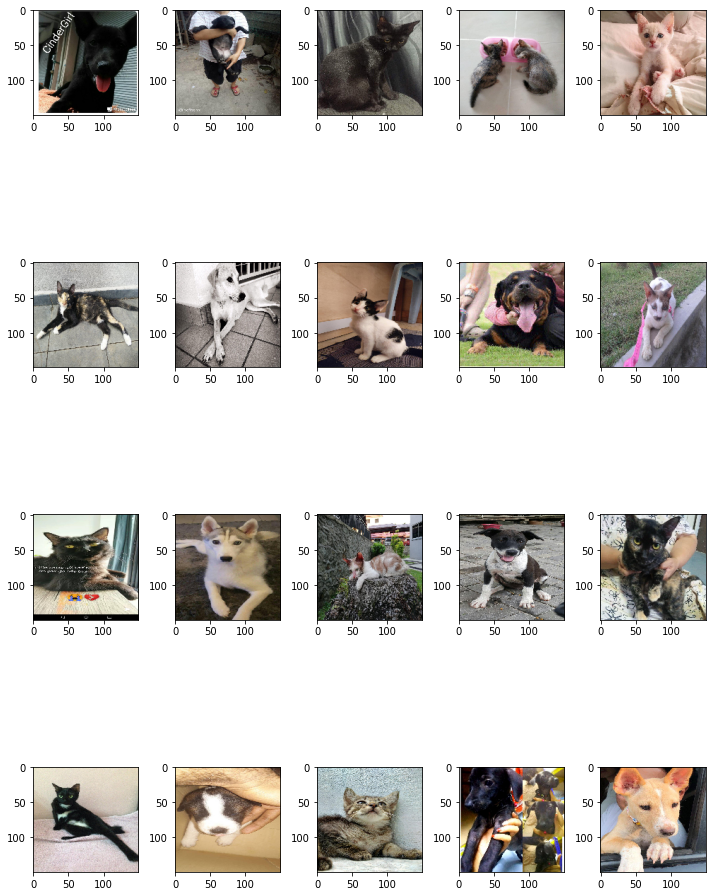

In [ ]:
# for i in range(3):
#     plt.imshow(train_generator[0][0][i]) # 
#     plt.show()
fig = plt.figure(figsize=(10,15))   
ax = list()
for i in range(20):
    ax.append(fig.add_subplot(4,5,i+1))  # subplot을 20개 만들어서 4행 5열 list에 저장

# train_generator로부터 img와 label을 뽑아요
for img, label in train_generator:
    for idx, img_data in enumerate(img): # enumerate  →맨 앞이 index로 빠지고 나머지 data가 이미지 data로 빠져요
        ax[idx].imshow(img_data)
    break    # break 하면 한 번만!!

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import matplotlib.pyplot as plt

train_dir = './cat_dog_full/train'
valid_dir = './cat_dog_full/validation'

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())  

model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [ ]:
# model.compile(loss='binary_crossentropy',
#               optimizer=Adam(learning_rate=1e-4),
#               metrics=['acc'])

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 787s 8s/step - loss: 0.6849 - acc: 0.5565 - val_loss: 0.6831 - val_acc: 0.5510
Epoch 2/30
100/100 [==============================] - 519s 5s/step - loss: 0.6563 - acc: 0.6175 - val_loss: 0.6420 - val_acc: 0.6380
Epoch 3/30
100/100 [==============================] - 369s 4s/step - loss: 0.6297 - acc: 0.6538 - val_loss: 0.6375 - val_acc: 0.6270
Epoch 4/30
100/100 [==============================] - 262s 3s/step - loss: 0.6050 - acc: 0.6733 - val_loss: 0.6090 - val_acc: 0.6840
Epoch 5/30
100/100 [==============================] - 191s 2s/step - loss: 0.5921 - acc: 0.6895 - val_loss: 0.6165 - val_acc: 0.6590
Epoch 6/30
100/100 [==============================] - 142s 1s/step - loss: 0.5811 - acc: 0.6970 - val_loss: 0.5763 - val_acc: 0.6800
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.5807 - acc: 0.7049 - val_loss: 0.5791 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 87s 871ms/step 

In [ ]:
# 모델 저장 
from google.colab import files
model.save('dog_cat_1.h5') # 저장
# files.download('dog_cat_1.h5') # 다운로드

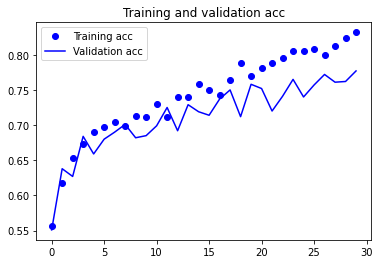

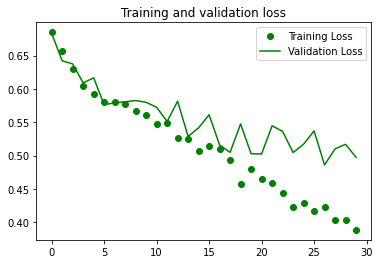

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# path='/content/drive/MyDrive/MultiCampus/Project II/pet_data/'
# train["file_path"] = train["Id"].apply(lambda x:path +"/train/"+ x + ".jpg")
# test["file_path"] = test["Id"].apply(lambda x:path +"/test/"+ x + ".jpg")

In [11]:
## 제대로 됨!
import numpy as np
from google.colab import files
from keras.preprocessing import image

def pred():
  uploaded=files.upload()
  
  for fn in uploaded.keys():
    path='/content/drive/MyDrive/MultiCampus/Project II/pet_data/' + fn
    img=image.load_img(path, target_size=(150, 150))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
      print(fn + " 사진은 강아지 입니다.")
    else:
      print(fn + " 사진은 고양이 입니다.")
    print(classes)

In [49]:
# 추가한 것
import os

path = "/content/drive/MyDrive/Project II/pet_data/cat_dog_full/train/dogs/"
file_list = os.listdir(path)
file_list_jpg = [file for file in file_list if file.endswith(".jpg")]
print ("file_list_py: {}".format(file_list_py))
print(len(file_list_jpg))
cnt=0
images_array=[]
for i in range(len(file_list_jpg)):
    img=image.load_img(path+file_list_jpg[i], target_size=(150, 150))
    #print(img)   #>>><PIL.Image.Image image mode=RGB size=150x150 at 0x7FC094E678D0>
    x=image.img_to_array(img)
    #print(x.shape)   #>>> [[[126. 122. 136.][ 98.  94. 108.][110. 106. 120.]
    x=np.expand_dims(x, axis=0)
    #print(x.shape)   # (150, 150, 3)  >>> (1, 150, 150, 3)
    images = np.vstack([x])
    #print(images)
    images_array.append(images)
    cnt+=1
    if cnt%1==0:
        print("{0}번째입니다.".format(i))



file_list_py: ['dog2493.jpg', 'dog2494.jpg', 'dog2495.jpg', 'dog2496.jpg', 'dog2497.jpg', 'dog2498.jpg', 'dog2499.jpg', 'dog2501.jpg', 'dog2500.jpg', 'dog2502.jpg', 'dog2503.jpg', 'dog2504.jpg', 'dog2506.jpg', 'dog2505.jpg', 'dog2507.jpg', 'dog2508.jpg', 'dog2509.jpg', 'dog2510.jpg', 'dog2511.jpg', 'dog2512.jpg', 'dog2513.jpg', 'dog2514.jpg', 'dog2515.jpg', 'dog2516.jpg', 'dog2518.jpg', 'dog2517.jpg', 'dog2520.jpg', 'dog2519.jpg', 'dog2521.jpg', 'dog2523.jpg', 'dog2522.jpg', 'dog2525.jpg', 'dog2524.jpg', 'dog2526.jpg', 'dog2527.jpg', 'dog2528.jpg', 'dog2529.jpg', 'dog2530.jpg', 'dog2531.jpg', 'dog2532.jpg', 'dog2533.jpg', 'dog2535.jpg', 'dog2534.jpg', 'dog2537.jpg', 'dog2536.jpg', 'dog2538.jpg', 'dog2539.jpg', 'dog2540.jpg', 'dog2541.jpg', 'dog2543.jpg', 'dog2542.jpg', 'dog2544.jpg', 'dog2545.jpg', 'dog2546.jpg', 'dog2547.jpg', 'dog2548.jpg', 'dog2549.jpg', 'dog2550.jpg', 'dog2552.jpg', 'dog2551.jpg', 'dog2553.jpg', 'dog2554.jpg', 'dog2555.jpg', 'dog2557.jpg', 'dog2556.jpg', 'dog2559.j

In [59]:
len(images_array)

3476

In [67]:
# 추가한 것 이부부은 제가 모델이 없어서 따로 추가하셔야할듯 합니다.
import random
from PIL import Image


random.randint(0,len(images_array))
from tensorflow import keras 
model = keras.models.load_model('/content/drive/MyDrive/Project II/pet_data/dog_cat_1.h5')


[1.]
454번째 사진은 강아지 입니다.


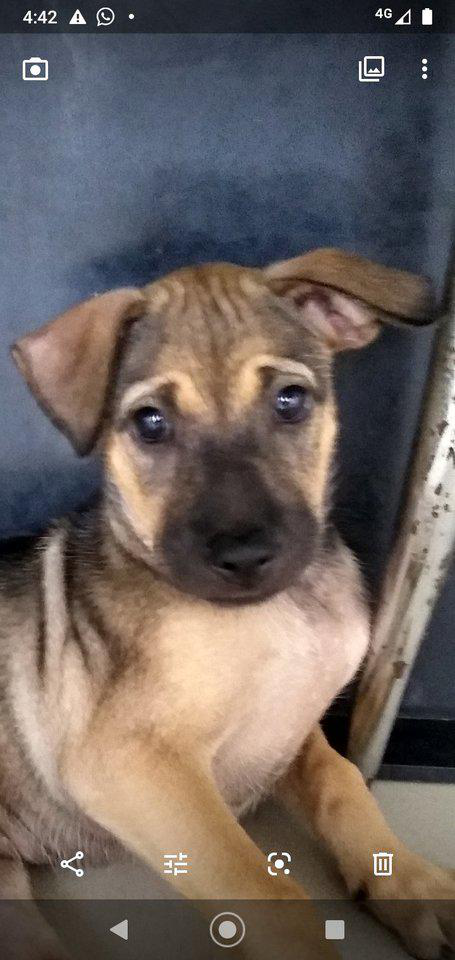

In [87]:
random_number=random.randint(0,len(images_array))
classes = model.predict(images_array[random_number], batch_size=10)
print(classes[0])
if classes[0]>0:
    print("{0}번째 사진은 강아지 입니다.".format(i))
else:
    print("{0}번째 사진은 고양이 입니다.".format(i))
r = Image.open(path+file_list_jpg[random_number])
r




In [81]:
path+file_list_jpg[0]
/content/drive/MyDrive/Project II/pet_data/cat_dog_full/train/dogs/dog1559.jpg

'/content/drive/MyDrive/Project II/pet_data/cat_dog_full/train/dogs/dog2493.jpg'

In [61]:
import random
random.randint(0,len(images_array))

3077

- 2번째

In [ ]:
# -------------------이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
validation_datagen = ImageDataGenerator(rescale=1./255) 

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20, # batch_size는 한번 flow_from_directory가 실행 될 때 생성할 이미지 수
                                                    target_size=(150,150),#크기
                                                    class_mode = 'binary')# 0 or 1로 labelling

validation_generator = validation_datagen.flow_from_directory(valid_dir,
                                                              batch_size=20,
                                                              target_size=(150,150),
                                                              class_mode = 'binary')

Found 7456 images belonging to 2 classes.
Found 2320 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
x=[0.00001, 0.000002, 0.000003, 0.999992, 0.000003]
np.argmax(x)

3

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 41s 401ms/step - loss: 0.6936 - acc: 0.5240 - val_loss: 0.6855 - val_acc: 0.5490
Epoch 2/30
100/100 [==============================] - 40s 400ms/step - loss: 0.6866 - acc: 0.5540 - val_loss: 0.6714 - val_acc: 0.5920
Epoch 3/30
100/100 [==============================] - 39s 396ms/step - loss: 0.6820 - acc: 0.5650 - val_loss: 0.6775 - val_acc: 0.5710
Epoch 4/30
100/100 [==============================] - 39s 395ms/step - loss: 0.6790 - acc: 0.5656 - val_loss: 0.6721 - val_acc: 0.5790
Epoch 5/30
100/100 [==============================] - 40s 396ms/step - loss: 0.6713 - acc: 0.5865 - val_loss: 0.6644 - val_acc: 0.5880
Epoch 6/30
100/100 [==============================] - 39s 394ms/step - loss: 0.6677 - acc: 0.5890 - val_loss: 0.6487 - val_acc: 0.6400
Epoch 7/30
100/100 [==============================] - 40s 397ms/step - loss: 0.6619 - acc: 0.6190 - val_loss: 0.6406 - val_acc: 0.6460
Epoch 8/30
100/100 [==============================] - 4

In [ ]:
# 모델 저장 

from google.colab import files
model.save('dog_cat_2.h5') # 저장
# files.download('dog_cat_1.h5') # 다운로드

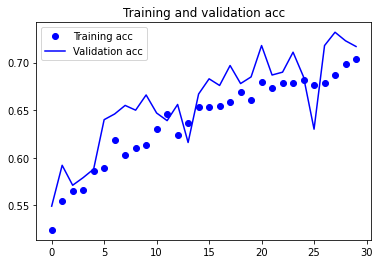

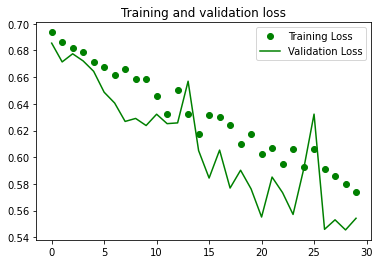

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
pred()

Saving cat87.jpg to cat87.jpg
[1.]
cat87.jpg 사진은 강아지 입니다.
[[1.]]


- vgg 16

In [ ]:
# -------------------이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
test_datagen = ImageDataGenerator(rescale=1./255) 

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    target_size=(150,150),
                                                    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                      batch_size=20,
                                                      target_size=(150,150),
                                                      class_mode = 'binary')

In [ ]:
from tensorflow.keras.applications import VGG16

VGG16_model = VGG16(weights='imagenet',
                    include_top=False,
                    input_shape=(150, 150, 3))

In [ ]:
last_layer = VGG16_model.get_layer('block5_pool')
print('last layer output shape: ', last_layer.output.shape)

In [ ]:
last_output = last_layer.output
last_output

In [ ]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

x = layers.Flatten()(last_output)


x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(VGG16_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
            loss='binary_crossentropy',
            metrics=['acc'])

In [ ]:
model.summary()

In [ ]:
history = model.fit(
  train_generator,
  validation_data=validation_generator,
  steps_per_epoch=100,
  epochs=20,
  validation_steps=50
)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from google.colab import files
model.save('dog_cat_VGG16.h5') # 저장
files.download('dog_cat_VGG16.h5') # 다운로드

In [ ]:
pred()

In [ ]:
from keras.applications.vgg16 import VGG16

# 이전 모든 예제에서는 최상단의 완전 연결 분류기를 제외했지만 여기서는 포함합니다
v_model = VGG16(weights='imagenet')

In [ ]:
uploaded=files.upload()

In [ ]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# 이미지 경로
img_path = '/content/drive/MyDrive/MultiCampus/Project II/pet_data/cat_sample.png'

# 224 × 224 크기의 파이썬 이미징 라이브러리(PIL) 객체로 반환됩니다
img = image.load_img(img_path, target_size=(224, 224))

# (224, 224, 3) 크기의 넘파이 float32 배열
x = image.img_to_array(img)

# 차원을 추가하여 (1, 224, 224, 3) 크기의 배치로 배열을 변환합니다
x = np.expand_dims(x, axis=0)

# 데이터를 전처리합니다(채널별 컬러 정규화를 수행합니다)
x = preprocess_input(x)

In [ ]:
preds = v_model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])